In [1]:
import torch
import time
from script.NeuralNets.Networks import SequentialNN
from script.settings import device, data_type
import script.DHOV.MultiDHOV as multidhov
from script.Verification.Verifier import SingleNeuronVerifier, MILPVerifier
import gurobipy as grp
from torchvision.datasets import MNIST
from torchvision.transforms import Compose, ToTensor, Normalize
from script.NeuralNets.ICNNFactory import ICNNFactory
import matplotlib.pyplot as plt
from script import eval
import numpy as np
import script.DHOV.DataSampling as ds

In [2]:
def imshow(img):
    img = img / 2 + .05  # revert normalization for viewing
    npimg = img.numpy()
    plt.imshow(npimg, cmap="gray")
    plt.show()

In [14]:
def get_verifier(icnn_factory):
    group_size = 5
    sample_count = 1000
    epochs = 200
    sampling_method = "per_group_sampling"
    dhov_verifier = multidhov.MultiDHOV()
    dhov_verifier.start_verification(nn, torch_image, icnn_factory, group_size, eps=eps, icnn_epochs=epochs,
                                     icnn_batch_size=10000, sample_count=sample_count, sample_new=False, use_over_approximation=True, break_after=5,
                                     sample_over_input_space=False, sample_over_output_space=True, tighten_bounds=True,
                                     use_fixed_neurons_in_grouping=False, sampling_method=sampling_method, layers_as_snr=[2,3,4], layers_as_milp=[],
                                     force_inclusion_steps=3, preemptive_stop=True, even_gradient_training=False,
                                     keep_ambient_space=True, data_grad_descent_steps=0, opt_steps_gd=100,
                                     train_outer=False, print_training_loss=False, print_new_bounds=False,
                                     grouping_method="consecutive", group_num_multiplier=5, store_samples=False, print_optimization_steps=False, print_last_loss=True,
                                     should_plot="none", optimizer="SdLBFGS", init_network=True, adapt_lambda="none")
    return dhov_verifier

In [15]:
transform = Compose([ToTensor(),  Normalize(0.5, 0.5)])
training_data = MNIST(root="../../mnist", train=True, download=True, transform=transform)

nn = SequentialNN([28 * 28 * 1, 256, 256, 256, 256, 10])
nn.load_state_dict(torch.load("../../mnist_fc 4x256.pth", map_location=torch.device('cpu')), strict=False)


parameter_list = list(nn.parameters())

output_size = 10
number_layer = (len(parameter_list) - 2) // 2

=========================================== 18 ===========================================


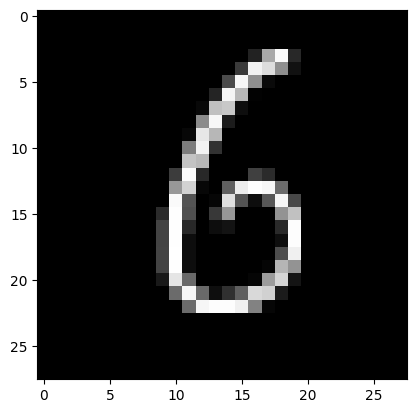

6
tensor([-172.0694, -176.8615, -162.1011, -177.4311, -169.6750, -166.8041,
        -183.9420, -177.7420, -171.6015, -172.2942], dtype=torch.float64,
       grad_fn=<AddBackward0>)
tensor([161.3770, 166.0988, 169.6522, 170.3519, 179.9586, 193.6648, 167.5022,
        195.0780, 178.0849, 175.9675], dtype=torch.float64,
       grad_fn=<AddBackward0>)
nn classifies image correct as 6


In [16]:
image_index = 18
eps = 0.009


print("=========================================== {} ===========================================".format(image_index))
image, label = training_data.__getitem__(image_index)
torch_image = torch.unsqueeze(image, 0).to(dtype=data_type).to(device)
imshow(torch_image[0][0])
print(label)

input_flattened = torch.flatten(torch_image)
simple_bounds_affine_out, simple_bounds_layer_out = nn.calculate_box_bounds([input_flattened.add(-eps), input_flattened.add(eps)])
print(simple_bounds_affine_out[-1][0])
print(simple_bounds_affine_out[-1][1])

if torch.argmax(nn(torch_image)).item() == label:
    print("nn classifies image correct as {}".format(label))
else:
    print("nn classifies image wrong")


In [17]:
icnn_factory = ICNNFactory("standard", [5, 1], adapt_layer_for_init=True)
standard_verifier = get_verifier(icnn_factory)


approximation of layer: 0
    number of fixed neurons for current layer: 213
    layer progress, group 1 of 9 
        time for sampling for one group: 0.03240633010864258


C:\Users\Ufuk\Documents\Programming\ICNN_verification\script\DHOV\MultiDHOV.py:86: UserWarning: keep_ambient_space is True and sampling method is per_group_sampling. Keeping previous samples is not supported when using per group sampling
  warnings.warn("keep_ambient_space is True and sampling method is per_group_sampling. "
C:\Users\Ufuk\Documents\Programming\ICNN_verification\script\DHOV\MultiDHOV.py:95: UserWarning: value for group number multiplier is given with grouping method consecutive. consecutive grouping does not use variable number of groups
  warnings.warn("value for group number multiplier is given with grouping method consecutive. "


Stop after 49 Epochs
test for test setup
test run 1 iterations,  with mean loss = 0.11867846628513437
test for without test setup
test run 1 iterations,  with mean loss = 0.11867846628513437
Stop after 49 Epochs
test for test setup
test run 1 iterations,  with mean loss = 0.10762855846185992
test for without test setup
test run 1 iterations,  with mean loss = 0.10762855846185992
Stop after 49 Epochs
test for test setup
test run 1 iterations,  with mean loss = 0.10476911653700224
test for without test setup
test run 1 iterations,  with mean loss = 0.10476911653700224
Stop after 49 Epochs
test for test setup
test run 1 iterations,  with mean loss = 0.11511583947816592
test for without test setup
test run 1 iterations,  with mean loss = 0.11511583947816592
        time for training: 9.3091881275177
        actual verification time 0.28943538665771484
        time for verification: 0.3711206912994385
    layer progress, group 2 of 9 
        time for sampling for one group: 0.0163249969482

In [22]:
icnn_factory = ICNNFactory("logical", [5, 1], always_use_logical_layer=False)
logical_verifier = get_verifier(icnn_factory)


approximation of layer: 0
    number of fixed neurons for current layer: 213
    layer progress, group 1 of 9 
        time for sampling for one group: 0.03237009048461914
Stop after 49 Epochs
test for test setup
test run 1 iterations,  with mean loss = 0.7943370028704058
test for without test setup
test run 1 iterations,  with mean loss = 0.47663751587643755
Stop after 49 Epochs
test for test setup
test run 1 iterations,  with mean loss = 0.7886914012107396
test for without test setup
test run 1 iterations,  with mean loss = 0.6652060756378565
Stop after 49 Epochs
test for test setup
test run 1 iterations,  with mean loss = 0.7754721898355224
test for without test setup
test run 1 iterations,  with mean loss = 0.6873025452507935
Stop after 49 Epochs
test for test setup
test run 1 iterations,  with mean loss = 0.7799558129426674
test for without test setup
test run 1 iterations,  with mean loss = 0.6796980931224382
        time for training: 11.186381101608276
        actual verificat

In [19]:
icnn_factory = ICNNFactory("approx_max",  [5, 1], maximum_function="SMU", function_parameter=0.3)
smu_verifier = get_verifier(icnn_factory)


approximation of layer: 0
    number of fixed neurons for current layer: 213
    layer progress, group 1 of 9 
        time for sampling for one group: 0.022077083587646484
Stop after 49 Epochs
test for test setup
test run 1 iterations,  with mean loss = 0.8278720143901128
test for without test setup
test run 1 iterations,  with mean loss = 0.8202312327616527
Stop after 49 Epochs
test for test setup
test run 1 iterations,  with mean loss = 0.8077179093639484
test for without test setup
test run 1 iterations,  with mean loss = 0.8012540217168636
Stop after 49 Epochs
test for test setup
test run 1 iterations,  with mean loss = 0.7957586785679833
test for without test setup
test run 1 iterations,  with mean loss = 0.790282528186939
Stop after 28 Epochs
test for test setup
test run 1 iterations,  with mean loss = 0.7953834990790059
test for without test setup
test run 1 iterations,  with mean loss = 0.788637918561689
        time for training: 6.331409454345703
        actual verification

In [23]:
test_sample_count = 300000
for i in range(len(standard_verifier.list_of_icnns)):
    for k in range(len(standard_verifier.list_of_icnns[i])):
        standard_group = standard_verifier.all_group_indices[i][k]
        logical_group = logical_verifier.all_group_indices[i][k]
        smu_group = smu_verifier.all_group_indices[i][k]
        standard_bounds_layer_out = smu_verifier.bounds_layer_out
        index_to_select = torch.tensor(smu_group)
        if (np.array(standard_group) == np.array(logical_group)).all() and (np.array(standard_group) == np.array(smu_group)).all():
            test_samples = torch.zeros((0, len(index_to_select)), dtype=data_type)
            test_samples = ds.samples_uniform_over(test_samples, test_sample_count,[torch.index_select(standard_bounds_layer_out[i][0], 0, index_to_select), torch.index_select(standard_bounds_layer_out[i][1], 0, index_to_select)])

            standard_icnn = standard_verifier.list_of_icnns[i][k]
            standard_out = standard_icnn(test_samples)
            standard_include = torch.where(standard_out <= 0, 1, 0).sum()

            logical_icnn = logical_verifier.list_of_icnns[i][k]
            logical_out = logical_icnn(test_samples)
            logical_include = torch.where(logical_out <= 0, 1, 0).sum()

            smu_icnn = smu_verifier.list_of_icnns[i][k]
            smu_out = smu_icnn(test_samples)
            smu_include = torch.where(smu_out <= 0, 1, 0).sum()

            print("layer {}, group:{}, group_size: {}, standard: {}, logical: {}, smu: {}".format(i, k, len(index_to_select), standard_include, logical_include, smu_include))

layer 0, group:0, group_size: 5, standard: 156050, logical: 140519, smu: 168474
layer 0, group:1, group_size: 5, standard: 212495, logical: 32584, smu: 33206
layer 0, group:2, group_size: 5, standard: 186730, logical: 54260, smu: 19518
layer 0, group:3, group_size: 5, standard: 172029, logical: 196150, smu: 196224
layer 0, group:4, group_size: 5, standard: 168761, logical: 104558, smu: 159755
